<a href="https://colab.research.google.com/github/MRamsey28/Astro1221/blob/main/MyOwnGravitationalWave_(GW200129_065458).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gwpy # installing package for analizing gravitational wave code

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99225 sha256=53cdb3a1628b39e1f32bc6be6afd5c72626ef0eb30858eb6bb1d54a294181c97
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [ ]:
# # -- Set a GPS time:
# copied the grav waves gps time
t0 = 1264316116.4   # -- GW200129_065458 (2020-01-29)
# t0 = 1187008882.4    # -- GW170817

from gwpy.timeseries import TimeSeries #importing just the time serise data, not the whole, data set, but just a portion of it
hdata = TimeSeries.fetch_open_data('H1', 1264316100, 1264316132) #data from Hanford, Washington during the time we are trying to look at, sixteen seconds on either side of the event

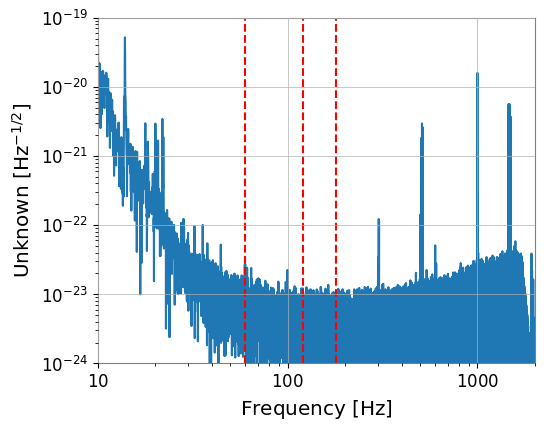

In [ ]:
import matplotlib.pyplot as plt #generating a plot for the data we gathered using the the matplot package

# -- Plot ASD
fig2 = hdata.asd().plot()
plt.xlim(10,2000)
ymin = 1e-24 #setting limits for how far our y axis can go
ymax = 1e-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red") #these are a multiple integers of our current. The signal that is overwhelming our grav sygnal is the AC current
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red") #we will be removing these frequency ranges
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red") #this plot helps us find the frequency of the noise we want to get ride of (the stuff overwhelming the Grav Wave)
#in this case, there is really no noise in these areas on our graph. But, there is still noise due to the electrical grid there so we will still try and get rid of it

In [ ]:
from gwpy.signal import filter_design #importing the filter data
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches) #this code filters the data noise we do not want, ignores the peak frequencies that we dont want

hfilt = hdata.filter(zpk, filtfilt=True)


In [ ]:
hdata = hdata.crop(*hdata.span.contract(1)) #cropping the data from 16 seconds on each end to 14 (28 total seconds)
hfilt = hfilt.crop(*hfilt.span.contract(1))

In [ ]:
print(*hdata.span.contract(1)) #visualizing this

1264316102.0 1264316130.0


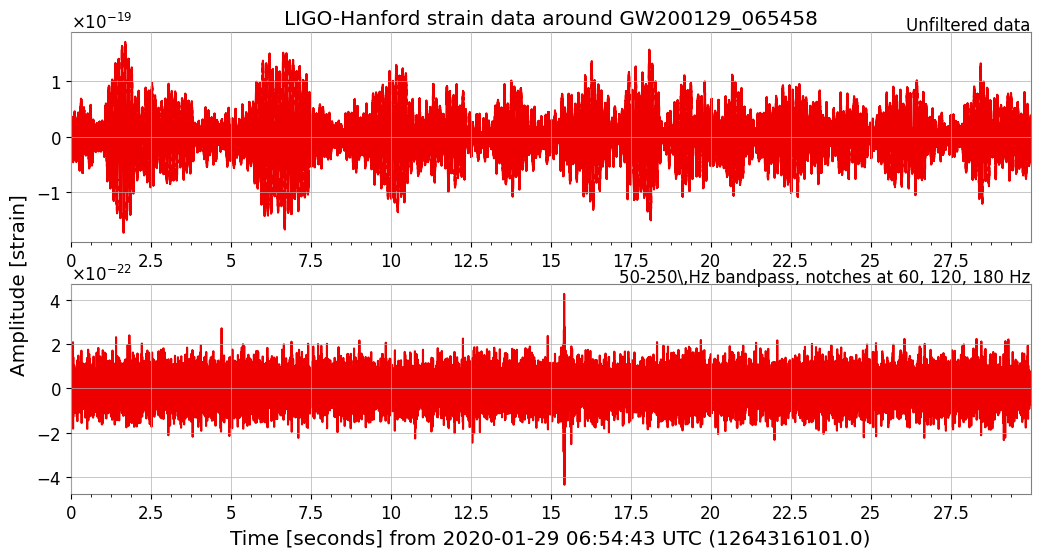

In [ ]:
from gwpy.plot import Plot #plotting what we wana look at, importing the plot function from GWPY, there is a more stadard way to do it with matplot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford') #plotting through gwpy import. there is a way to do it through the normal matplot though
ax1, ax2 = plot.axes #makes two diff graphs
ax1.set_title('LIGO-Hanford strain data around GW200129_065458') #the rest of this is just labeling the graph
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

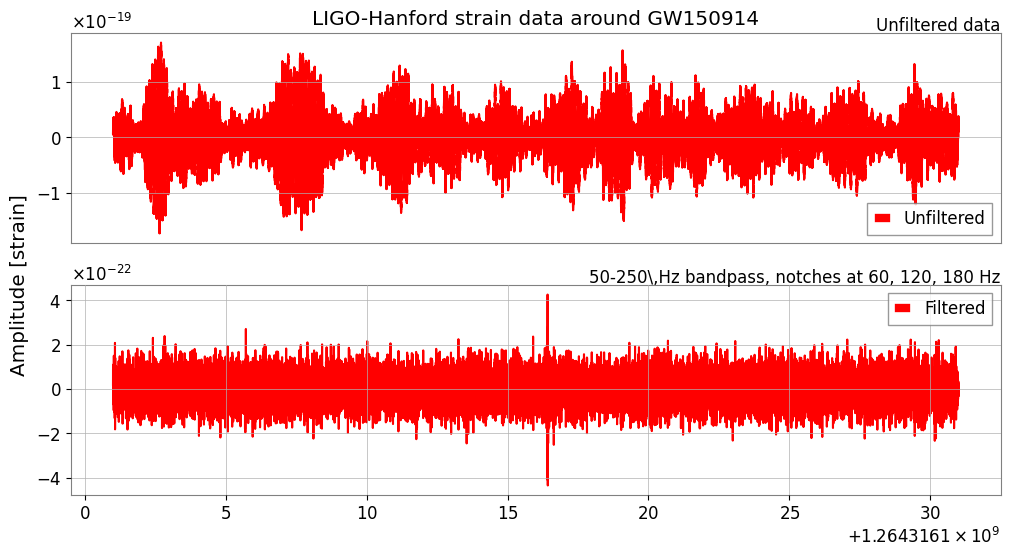

In [ ]:
plt.figure(figsize=[12,6]) #this is the stadard way of plotting everything using matplot
ax1 = plt.subplot (2, 1, 1) #creating the first of the two plots, defining this as the first subplot
ax1.plot(hdata.times.value, hdata.value, color="red", label="Unfiltered") #plotting the values for Hanford
plt.legend() #labeling things on the plot
ax1.set_title('LIGO-Hanford strain data around GW200129_065458')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.xaxis.set_visible(False)
ax2 = plt.subplot (2, 1, 2) # using the smae code as before, but defining this as the second subplot
ax2.plot(hfilt.times.value, hfilt.value, color="red", label="Filtered") #plotting the data
ax2.set_ylabel('') #labeling things from here on out
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz', transform=ax2.transAxes, ha='right')
plt.legend()

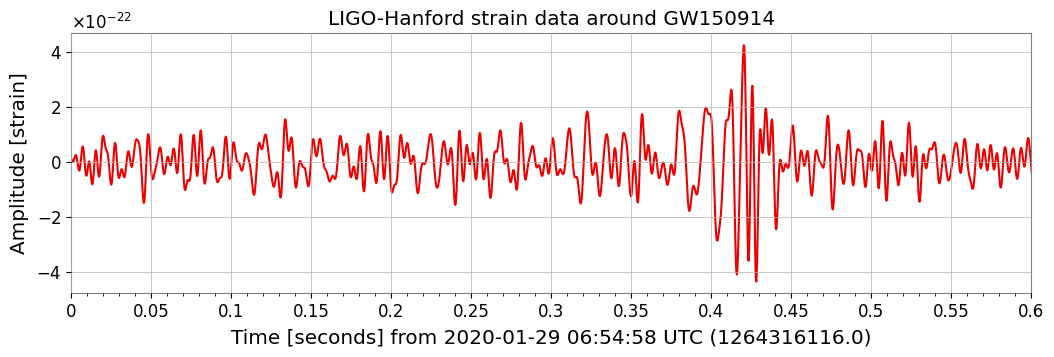

In [ ]:
import matplotlib.pyplot as plt #Becasue the data is so streched, and we just want to look at a small fraction of a second, we are cropping it to the 0.6 seconds here

plot = hfilt.plot(color='gwpy:ligo-hanford') #reploting the data for hanford
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW200129_065458')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(1264316116, 1264316116.6) #zooming in to a smaller interval of only 0.6 seconds
ax.set_xscale('seconds', epoch=1264316116)
plot.show()

x_val = plt.gca().lines[0].get_xdata() #these lines just help lable the graph
y_val = plt.gca().lines[0].get_ydata()


In [ ]:
ldata = TimeSeries.fetch_open_data('L1', 1264316100, 1264316132) #now we use ldata to do this all for the ligo data
lfilt = ldata.filter(zpk, filtfilt=True)

In [ ]:
lfilt.shift('-5.4ms') #thre is a small difference in time between the two, this accounts for that time delay in the grav wave hitting Livingston vs Hanford
lfilt *= -1

In [ ]:
print(-6.9 * 1e-3 * 3e8) #this is us visualizing that time difference of when the event happens at Livingston vs Hanford

-2070000.0000000002


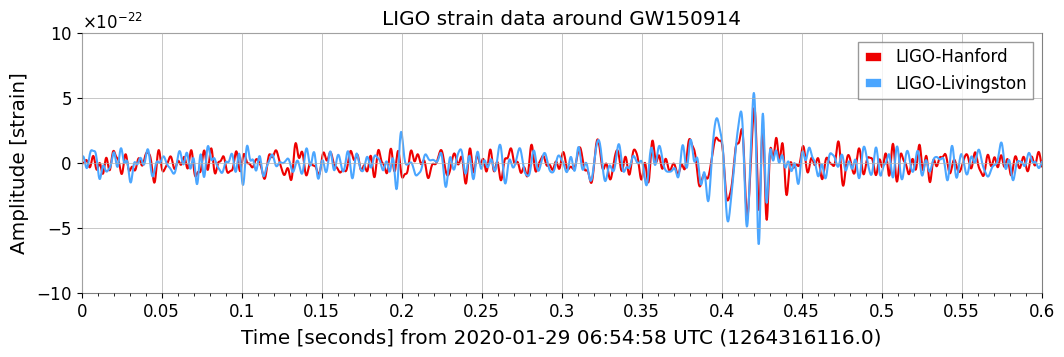

In [ ]:
plot = Plot(figsize=[12, 4]) #creating a plot
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford') #plotting the Hanford data
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston') #plottinghte Livinston data
ax.set_title('LIGO strain data around GW150914') #labeling the graph
ax.set_xlim(1264316116, 1264316116.6) #setting the limit for that 0.6 seconds we want to look at
ax.set_xscale('seconds', epoch=1264316116) #more labeling
ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-1e-21, 1e-21) #setting the limit to be our strain amount
ax.legend()
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

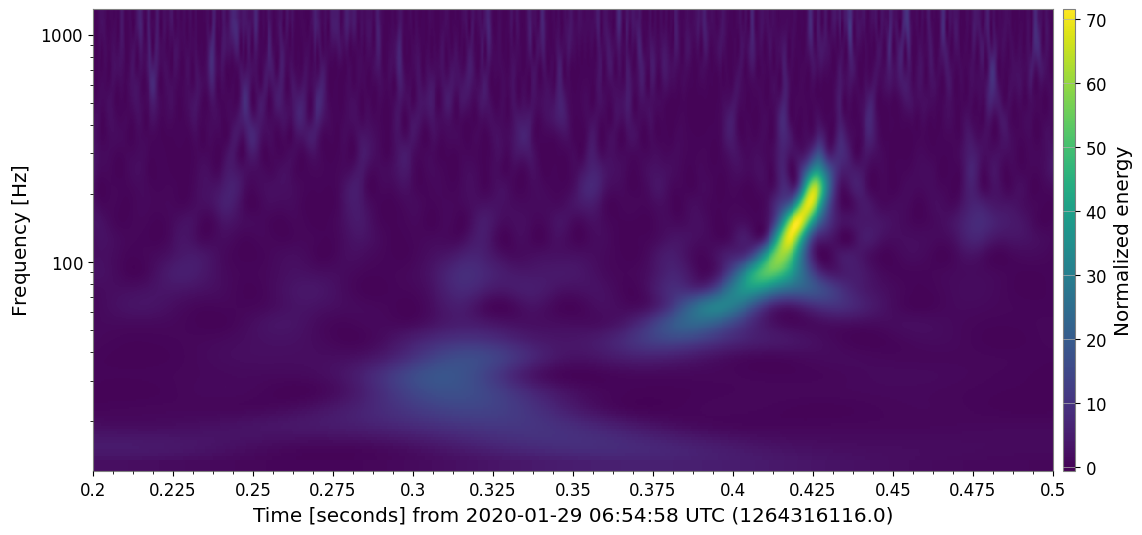

In [ ]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1)) #turning our data into frequency data
fig4 = hq.plot() #creating the plot
ax = fig4.gca() #plotting the data
fig4.colorbar(label="Normalized energy") #ading a color bar refrence scale
ax.grid(False) #removing the grid
ax.set_yscale('log')

As time progresses, frequency gets higher for the grav wave the very bright spot is the most intense part of the grav wave

In [ ]:
from scipy.io.wavfile import write #importing more packages
import numpy as np

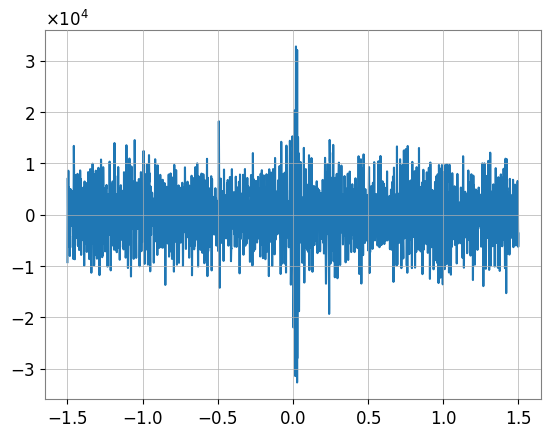

In [ ]:
amplitude = np.iinfo(np.int16).max #turning the data we found into something that can be translated into a sound. This is the plot version of it

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5)))
y = y_val[ind]
# y = y**3
y = y / np.max(y)
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

In [ ]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
print("fs = ", fs)
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16)) #creating a file for this sound

fs =  4096


In [ ]:
from google.colab import files #importing a package to let is download files
files.download("example.wav") #dowloading our newly created audio file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The mass of object one is 34.5 solmasses and the second object is 29.0 solmasses. After the merger they are 63.3 solmasses. there distance from eachother is 890 mpc.

In [2]:
import astropy.units as u
import astropy.constants as ac
import numpy as np

In [3]:
#from zooming in on the graph containing both the Linvinston and Handford data, I found the period for which we need to calculate the masses
T = (0.4258 - 0.4201) * u.s
M_BH = (T * ac.c**3) / (16 * ac.G)
print(M_BH.to(u.solMass))
#The Real Total Mass is 63.5, so this is some what off somewhat off

72.32781539688025 solMass


In [6]:
S = 1e-21
D = T * ac.c / (16 * np.pi * S)
print(D.to(u.Mpc)) # this number is also slightly off (supposed to be 890)

1101.7299559577643 Mpc


In [8]:
#to find the energy released you do the the difference in mass times the c^2 (e=mc^2)
M_Real = 60.2 * u.solMass
M_Tot = (34.5 + 29) * u.solMass
E = (M_Tot - M_Real) * (ac.c**2)
print(E.to(u.J))

5.897409106846217e+47 J
